## Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, LabelEncoder, StandardScaler
import optuna
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.svm import SVR
import seaborn as sns
import catboost as cb

## Importing data

In [2]:
def import_data():
    global X_train, y_train, X_test, ids, enc
    X_train = pd.read_csv('train.csv')
    y_train = X_train['charges']
    X_train.drop(['id', 'charges'], inplace = True, axis = 1)
    X_test = pd.read_csv('test.csv')
    ids = X_test['id']
    X_test.drop('id', inplace = True, axis = 1)
    enc = OneHotEncoder()
    encoded_features = pd.DataFrame(enc.fit_transform(X_train[['sex', 'smoker', 'region']]).toarray(), columns=['female', 'male', 'not smoking', 'smoking', 'NE', 'NW', 'SE', 'SW'])
    X_train.drop(['sex', 'smoker', 'region'], axis = 1, inplace = True)
    X_train = pd.concat([X_train, encoded_features], axis = 1)
    encoded_features = pd.DataFrame(enc.transform(X_test[['sex', 'smoker', 'region']]).toarray(), columns=['female', 'male', 'not smoking', 'smoking', 'NE', 'NW', 'SE', 'SW'])
    X_test.drop(['sex', 'smoker', 'region'], axis = 1, inplace = True)
    X_test = pd.concat([X_test, encoded_features], axis = 1)
    X_test
import_data()

In [3]:
def import_data_no_enc():
    global X_train, y_train, X_test, ids
    X_train = pd.read_csv('train.csv')
    y_train = X_train['charges']
    X_train.drop(['id', 'charges'], inplace = True, axis = 1)
    X_test = pd.read_csv('test.csv')
    ids = X_test['id']
    X_test.drop('id', inplace = True, axis = 1)

In [5]:
X_train.describe()

,age,bmi,children,female,male,not smoking,smoking,NE,NW,SE,SW
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,39.064275,30.373744,1.091181,0.497758,0.502242,0.808670,0.191330,0.266069,0.248132,0.260090,0.225710
std,14.324314,6.016210,1.210878,0.500369,0.500369,0.393643,0.393643,0.442231,0.432252,0.439012,0.418362
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.030000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.115000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,34.300000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X_test.describe()

,age,bmi,children,female,male,not smoking,smoking,NE,NW,SE,SW
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,39.349776,30.953049,1.098655,0.491779,0.508221,0.781764,0.218236,0.218236,0.237668,0.284006,0.260090
std,13.779386,6.169976,1.200978,0.500306,0.500306,0.413358,0.413358,0.413358,0.425973,0.451277,0.439012
min,18.000000,16.815000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.410000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.590000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,35.200000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,52.580000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Some plots

My ideas:
1. Use target encoding
2. Dumb feature generation

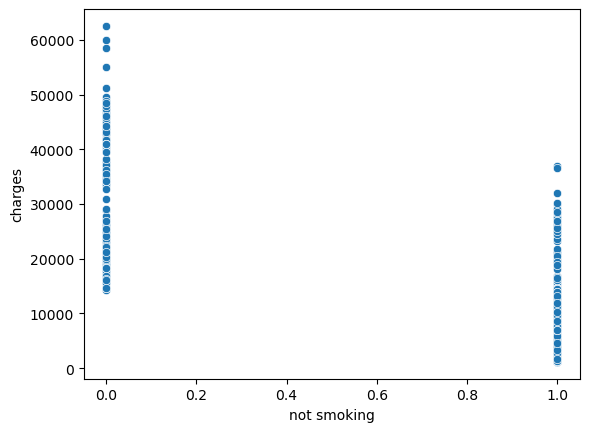

In [65]:
sns.scatterplot(x=X_train['not smoking'], y =y_train)
plt.show()

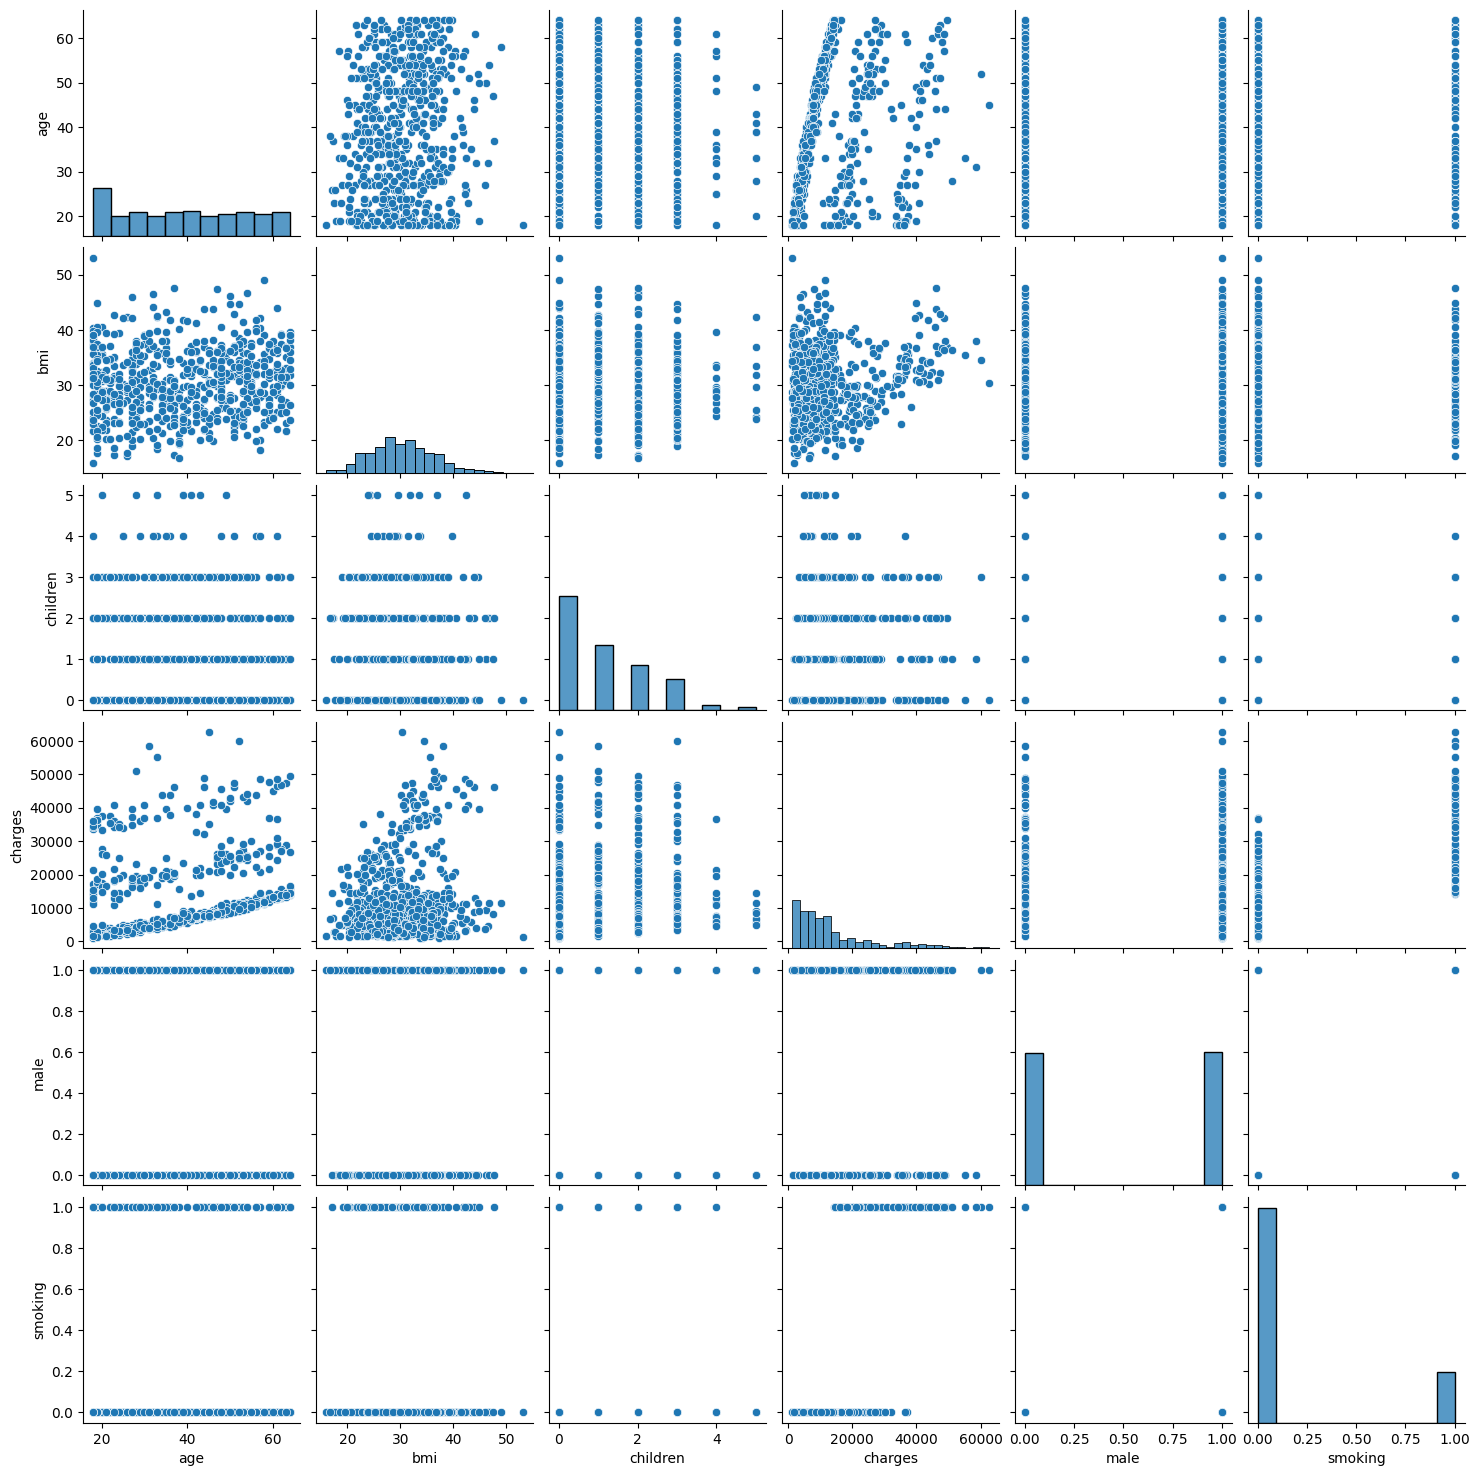

In [20]:
df_pairplot = pd.read_csv('train.csv')
df_pairplot.drop('id', axis = 1, inplace = True)
df_pairplot
enc_features = pd.DataFrame(enc.transform(df_pairplot[['sex', 'smoker', 'region']]).toarray(), columns=['female', 'male', 'not smoking', 'smoking', 'NE', 'NW', 'SE', 'SW'])
df_pairplot.drop(['sex', 'smoker', 'region'], axis = 1, inplace = True)
df_pairplot = pd.concat([df_pairplot , enc_features], axis = 1)
sns.pairplot(data=df_pairplot.drop(['not smoking', 'female', 'NE', 'NW', 'SE', 'SW'], axis = 1), )
plt.show()

<Axes: >

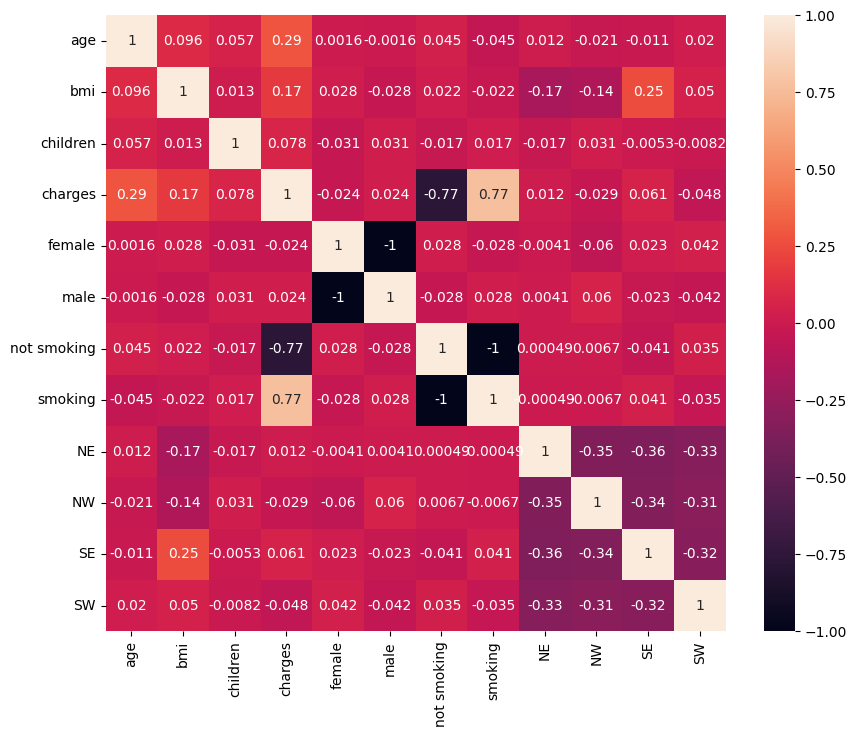

In [23]:
plt.figure(figsize=(10, 8), dpi = 100)
sns.heatmap(df_pairplot.corr(), annot=True)

<Axes: title={'center': 'На X_train'}, xlabel='age', ylabel='charges'>

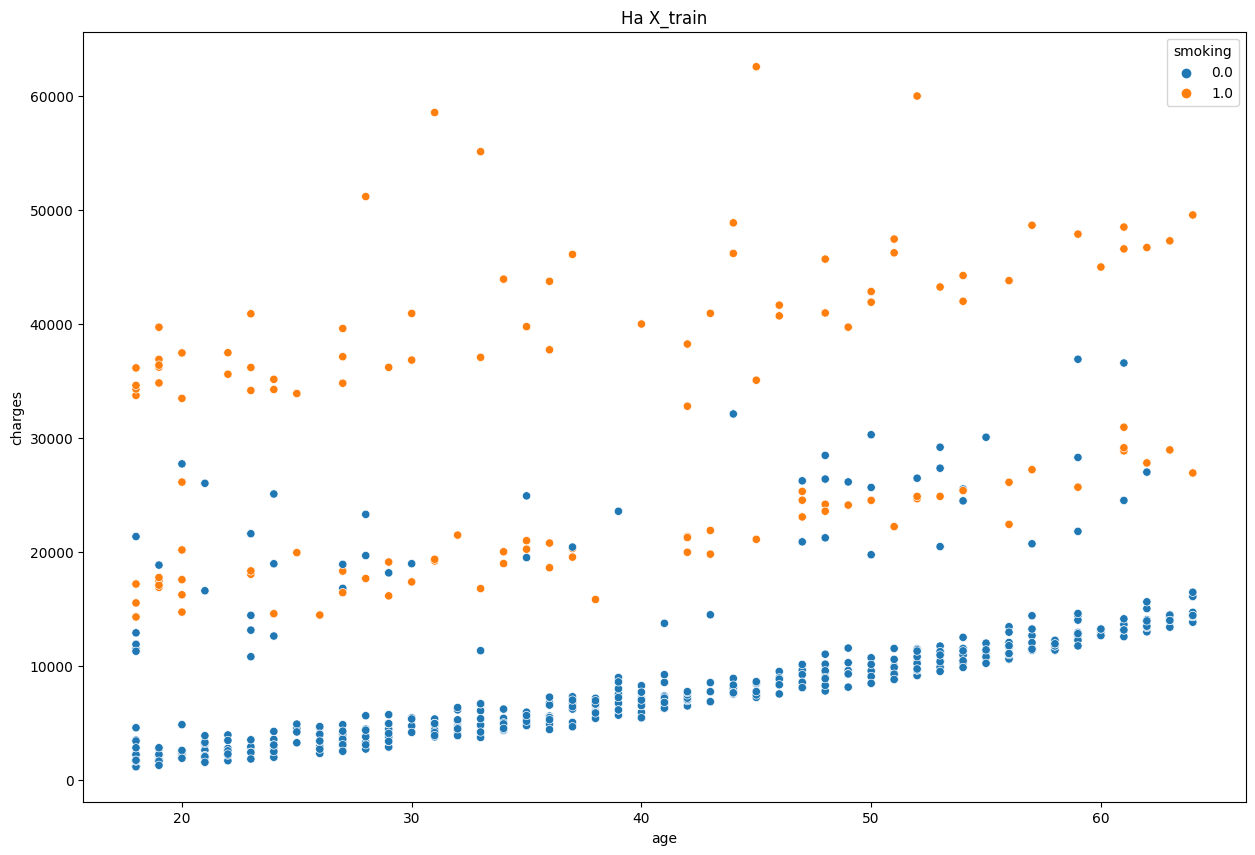

In [12]:
plt.figure(figsize=(15,10))
plt.title('На X_train')
sns.scatterplot(data=df_pairplot, x='age', y='charges', hue='smoking')

<Axes: title={'center': 'На X_train'}, xlabel='bmi', ylabel='charges'>

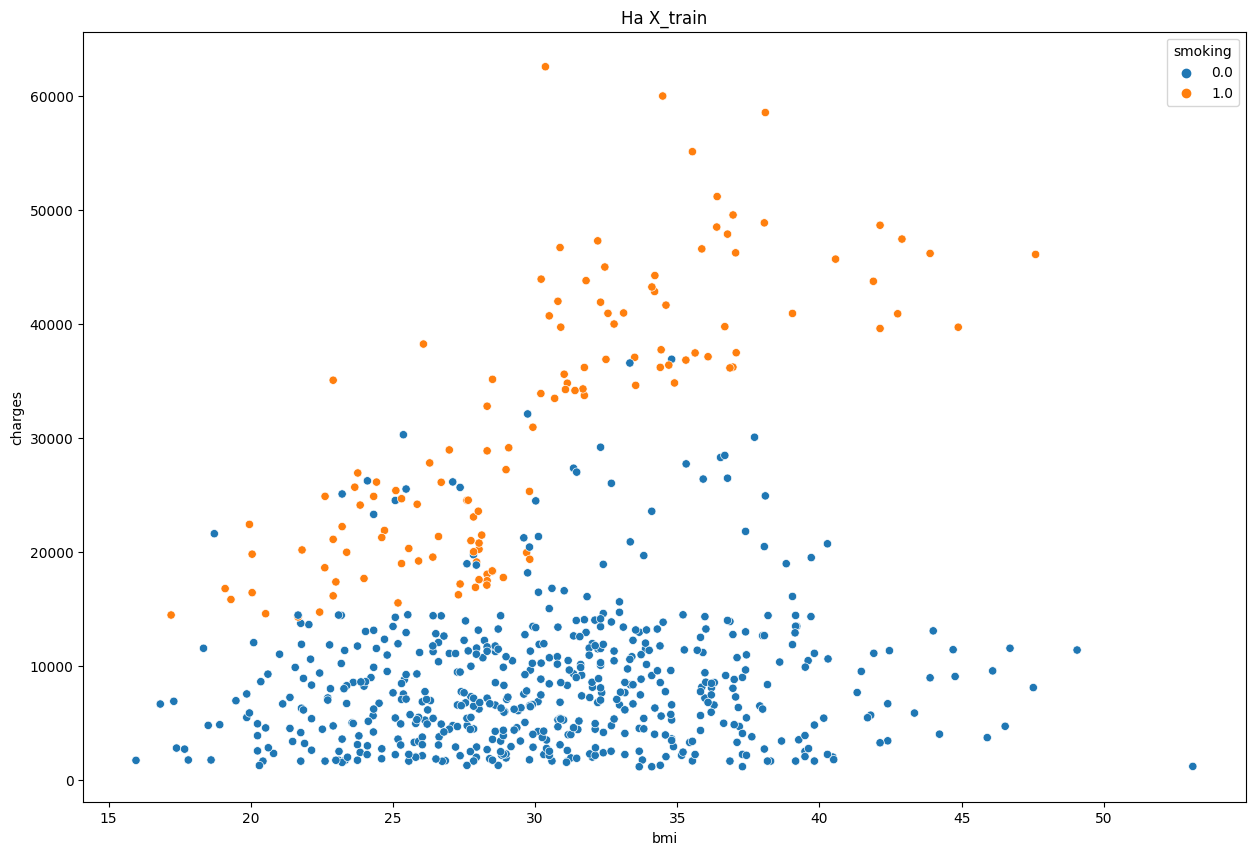

In [21]:
plt.figure(figsize=(15,10))
plt.title('На X_train')
sns.scatterplot(data=df_pairplot, x='bmi', y='charges', hue='smoking')

## Models

### Baseline

#### Linear regression

In [17]:
import_data()
X_train.drop(['not smoking', 'SW', 'female'], axis = 1, inplace= True)
X_train['age * smoking'] = X_train.age * X_train.smoking
X_train['bmi * smoking'] = X_train.bmi * X_train.smoking
X_train['children * smoking'] = X_train.children * X_train.smoking
X_train['NE * smoking'] = X_train.NE * X_train.smoking
X_train['NW * smoking'] = X_train.NW * X_train.smoking
X_train['SE * smoking'] = X_train.SE * X_train.smoking
X_train['age * male'] = X_train.age * X_train.male
X_train['bmi * male'] = X_train.bmi * X_train.male
X_train['children * male'] = X_train.children * X_train.male
X_train['age * bmi'] = X_train.age * X_train.bmi


X_test.drop(['not smoking', 'SW', 'female'], axis = 1, inplace= True)
X_test['age * smoking'] = X_test.age * X_test.smoking
X_test['bmi * smoking'] = X_test.bmi * X_test.smoking
X_test['children * smoking'] = X_test.children * X_test.smoking
X_test['NE * smoking'] = X_test.NE * X_test.smoking
X_test['NW * smoking'] = X_test.NW * X_test.smoking
X_test['SE * smoking'] = X_test.SE * X_test.smoking
X_test['age * male'] = X_test.age * X_test.male
X_test['bmi * male'] = X_test.bmi * X_test.male
X_test['children * male'] = X_test.children * X_test.male
X_test['age * bmi'] = X_test.age * X_test.bmi

X_test

,age,bmi,children,male,smoking,NE,NW,SE,age * smoking,bmi * smoking,children * smoking,NE * smoking,NW * smoking,SE * smoking,age * male,bmi * male,children * male,age * bmi
0,45,25.175,2,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1132.875
1,36,30.020,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1080.720
2,64,26.885,0,0.0,1.0,0.0,1.0,0.0,64.0,26.885,0.0,0.0,1.0,0.0,0.0,0.000,0.0,1720.640
3,46,25.745,3,1.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,46.0,25.745,3.0,1184.270
4,19,31.920,0,1.0,1.0,0.0,1.0,0.0,19.0,31.920,0.0,0.0,1.0,0.0,19.0,31.920,0.0,606.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,57,40.370,0,1.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.0,57.0,40.370,0.0,2301.090
665,34,34.210,0,1.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.0,34.0,34.210,0.0,1163.140
666,49,36.630,3,0.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1794.870
667,45,27.830,2,0.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1252.350


In [34]:
import_data()

In [21]:
param_grid = {
    'l1_ratio':list(np.linspace(0.00001, 0.9999999, 50)),
    'alphas': list(np.linspace(0.01, 50, 100))
    }
lin_reg = ElasticNetCV(cv = 2, **param_grid, max_iter = 2000)
lin_reg.fit(X_train, y_train)
y_pred['id'] = ids 
y_pred['charges'] = lin_reg.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred


,id,charges
0,770,10436.431980
1,771,6589.029720
2,772,33427.992209
3,773,10351.974506
4,774,29892.825276
...,...,...
664,1434,13148.938745
665,1435,6189.063789
666,1436,12572.891306
667,1437,10110.069641


In [36]:
print(lin_reg.alpha_)
lin_reg.l1_ratio_

97.10612612612614


0.9999999

In [18]:
def objective(trial):
    param_grid = {
    'l1_ratio': trial.suggest_float('l1_ratio', 0.00001, 0.9999999),
    'alpha': trial.suggest_float('alpha', 0.01, 50)}
    MSLE = make_scorer(mean_squared_log_error)
    lin_reg = ElasticNet( **param_grid, max_iter = 2000)
    return np.sqrt(cross_val_score(estimator= lin_reg, X=X_train, y=y_train, cv = 2, scoring = MSLE).mean())
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout = 600)
study.best_params
lin_reg = ElasticNet(**study.best_params)
lin_reg.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = lin_reg.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred

[I 2023-09-27 09:13:04,040] A new study created in memory with name: no-name-2065cf4d-0770-4eec-8a56-5a619938203d
[I 2023-09-27 09:13:04,070] Trial 0 finished with value: 0.4541079792896914 and parameters: {'l1_ratio': 0.3298737580996288, 'alpha': 7.74372882892271}. Best is trial 0 with value: 0.4541079792896914.
[I 2023-09-27 09:13:04,084] Trial 1 finished with value: 0.4268273906721815 and parameters: {'l1_ratio': 0.9500347212169951, 'alpha': 2.8388478359330853}. Best is trial 1 with value: 0.4268273906721815.
[I 2023-09-27 09:13:04,096] Trial 2 finished with value: 0.5298121402243325 and parameters: {'l1_ratio': 0.23290458903212793, 'alpha': 48.8164626670988}. Best is trial 1 with value: 0.4268273906721815.
[I 2023-09-27 09:13:04,109] Trial 3 finished with value: 0.44061249948858944 and parameters: {'l1_ratio': 0.7878740401887304, 'alpha': 12.830658527444152}. Best is trial 1 with value: 0.4268273906721815.
[I 2023-09-27 09:13:04,122] Trial 4 finished with value: 0.49449005858228096

,id,charges
0,770,10915.578504
1,771,7123.346466
2,772,32028.028736
3,773,10678.847007
4,774,29101.246611
...,...,...
664,1434,13802.474963
665,1435,6511.876780
666,1436,12781.868023
667,1437,10256.438870


In [6]:
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = lin_reg.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred

,id,charges
0,770,10835.596079
1,771,6987.821190
2,772,32533.502200
3,773,10580.756318
4,774,29279.720073
...,...,...
664,1434,13412.756428
665,1435,6491.890726
666,1436,12664.956501
667,1437,10228.109663


In [6]:
xgr = xgb.XGBRFRegressor()
xgr.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = xgr.predict(X_test)

In [49]:
rf_r = RandomForestRegressor(**study.best_params)
rf_r.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = rf_r.predict(X_test)

In [51]:
y_pred.to_csv('submission.csv', index = False)
y_pred

,id,charges
0,770,9723.870009
1,771,5881.963964
2,772,26458.340570
3,773,9334.867959
4,774,36355.498047
...,...,...
664,1434,12448.277225
665,1435,5513.933430
666,1436,13207.605863
667,1437,9518.469827


In [11]:
import_data()

In [12]:
X_train

,age,bmi,children,female,male,not smoking,smoking,NE,NW,SE,SW
0,43,26.030,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,58,28.215,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,53,31.350,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,54,29.200,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,19,34.900,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
664,18,31.350,4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
665,39,23.870,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
666,58,25.175,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
667,37,47.600,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## SVR

Target encoding?
Наверное, должно помочь

In [8]:
X_train

,age,sex,bmi,children,smoker,region
0,43,male,26.030,0,no,northeast
1,58,female,28.215,0,no,northwest
2,53,male,31.350,0,no,southeast
3,54,male,29.200,1,no,southwest
4,19,male,34.900,0,yes,southwest
...,...,...,...,...,...,...
664,18,female,31.350,4,no,northeast
665,39,female,23.870,5,no,southeast
666,58,male,25.175,0,no,northeast
667,37,female,47.600,2,yes,southwest


In [13]:
X_test

,age,sex,bmi,children,smoker,region
0,45,female,25.175,2,no,northeast
1,36,female,30.020,0,no,northwest
2,64,female,26.885,0,yes,northwest
3,46,male,25.745,3,no,northwest
4,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
664,57,male,40.370,0,no,southeast
665,34,male,34.210,0,no,southeast
666,49,female,36.630,3,no,southeast
667,45,female,27.830,2,no,southeast


In [22]:
X_train.drop(['age', 'bmi', 'children'], axis = 1)

,sex,smoker,region
0,male,no,northeast
1,female,no,northwest
2,male,no,southeast
3,male,no,southwest
4,male,yes,southwest
...,...,...,...
664,female,no,northeast
665,female,no,southeast
666,male,no,northeast
667,female,yes,southwest


In [26]:
import_data_no_enc()
X_train
t_enc = TargetEncoder()
encoded = t_enc.fit_transform(X_train.drop(['age', 'bmi', 'children'], axis = 1), y_train)
X_train.drop(['sex', 'smoker', 'region'], axis = 1,inplace = True)
X_train['sex'] = encoded[:, 0]
X_train['smoker'] = encoded[:, 1]
X_train['region'] = encoded[:, 2]

encoded_test = t_enc.transform(X_test.drop(['age', 'bmi', 'children'], axis = 1))
X_test.drop(['sex', 'smoker', 'region'], axis = 1,inplace = True)
X_test['sex'] = encoded_test[:, 0]
X_test['smoker'] = encoded_test[:, 1]
X_test['region'] = encoded_test[:, 2]


,age,bmi,children,sex,smoker,region
0,45,25.175,2,12607.620044,8534.111229,13132.310957
1,36,30.020,0,12607.620044,8534.111229,12307.208974
2,64,26.885,0,12607.620044,31184.206888,12307.208974
3,46,25.745,3,13176.642911,8534.111229,12307.208974
4,19,31.920,0,13176.642911,31184.206888,12307.208974
...,...,...,...,...,...,...
664,57,40.370,0,13176.642911,8534.111229,14094.951858
665,34,34.210,0,13176.642911,8534.111229,14094.951858
666,49,36.630,3,12607.620044,8534.111229,14094.951858
667,45,27.830,2,12607.620044,8534.111229,14094.951858


In [26]:
def objective(trial):
    param_grid = {
    'C': trial.suggest_float('C', 0.01, 50),
    'tol': trial.suggest_float('tol', 1e-5, 1e-1)}
    MSLE = make_scorer(mean_squared_log_error)
    svr = SVR( **param_grid, kernel='linear')
    return np.sqrt(cross_val_score(estimator= svr, X=X_train, y=y_train, cv = 2, scoring = MSLE).mean())
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200, timeout = 600)
study.best_params
lin_reg = SVR(**study.best_params, kernel = 'linear')
lin_reg.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = lin_reg.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred

[I 2023-10-02 12:43:48,062] A new study created in memory with name: no-name-2feebeff-71c4-4adb-8268-6722be2a85a1
[I 2023-10-02 12:43:48,138] Trial 0 finished with value: 0.45673435128905127 and parameters: {'C': 24.983863026753504, 'tol': 0.09652737866575535}. Best is trial 0 with value: 0.45673435128905127.
[I 2023-10-02 12:43:48,194] Trial 1 finished with value: 0.4549207111323798 and parameters: {'C': 30.66909282253807, 'tol': 0.023067630178309054}. Best is trial 1 with value: 0.4549207111323798.
[I 2023-10-02 12:43:48,226] Trial 2 finished with value: 0.6338734296715629 and parameters: {'C': 9.923378382994846, 'tol': 0.06855421307865617}. Best is trial 1 with value: 0.4549207111323798.
[I 2023-10-02 12:43:48,251] Trial 3 finished with value: 0.7014028663960203 and parameters: {'C': 7.334069109547033, 'tol': 0.027429400002026056}. Best is trial 1 with value: 0.4549207111323798.
[I 2023-10-02 12:43:48,293] Trial 4 finished with value: 0.7612442018534527 and parameters: {'C': 5.05517

,id,charges
0,770,9221.193938
1,771,6141.832844
2,772,28151.787263
3,773,9247.279463
4,774,16893.229147
...,...,...
664,1434,11034.318044
665,1435,5090.737488
666,1436,10373.131187
667,1437,8641.879591


In [27]:
def objective(trial):
    param_grid = {
    'C': trial.suggest_float('C', 0.01, 50),
    'tol': trial.suggest_float('tol', 1e-5, 1e-1)}
    MSLE = make_scorer(mean_squared_log_error)
    svr = SVR( **param_grid, kernel='linear')
    return np.sqrt(cross_val_score(estimator= svr, X=X_train, y=y_train, cv = 2, scoring = MSLE).mean())
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, timeout = 600)
study.best_params
lin_reg = SVR(**study.best_params, kernel = 'linear')
lin_reg.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = lin_reg.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred

[I 2023-10-02 12:44:06,726] A new study created in memory with name: no-name-8eae5cd8-8265-44fb-86b8-7c1eed84c4e2
[I 2023-10-02 12:44:06,782] Trial 0 finished with value: 0.4542428431568861 and parameters: {'C': 39.95565461897202, 'tol': 0.09104639058247281}. Best is trial 0 with value: 0.4542428431568861.
[I 2023-10-02 12:44:06,822] Trial 1 finished with value: 0.4536503547299663 and parameters: {'C': 41.8186243550767, 'tol': 0.04941859762230674}. Best is trial 1 with value: 0.4536503547299663.
[I 2023-10-02 12:44:06,855] Trial 2 finished with value: 0.45447701545067903 and parameters: {'C': 28.561698954913414, 'tol': 0.06799002150559803}. Best is trial 1 with value: 0.4536503547299663.
[I 2023-10-02 12:44:06,898] Trial 3 finished with value: 0.45889374564541746 and parameters: {'C': 22.810589871039532, 'tol': 0.040991903628207704}. Best is trial 1 with value: 0.4536503547299663.
[I 2023-10-02 12:44:06,942] Trial 4 finished with value: 0.456193889750629 and parameters: {'C': 46.749118

,id,charges
0,770,9279.401307
1,771,6171.198158
2,772,28570.204492
3,773,9247.057067
4,774,17091.539354
...,...,...
664,1434,11077.918669
665,1435,5052.430514
666,1436,10443.488877
667,1437,8699.479887


In [ ]:
def objective(trial):
    param_grid = {
    'C': trial.suggest_float('C', 0.01, 50),
    'tol': trial.suggest_float('tol', 1e-5, 1e-1)}
    MSLE = make_scorer(mean_squared_log_error)
    svr = SVR( **param_grid, kernel='linear')
    return np.sqrt(cross_val_score(estimator= svr, X=X_train, y=y_train, cv = 2, scoring = MSLE).mean())
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, timeout = 600)
study.best_params
lin_reg = SVR(**study.best_params, kernel = 'linear')
lin_reg.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = lin_reg.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred

[I 2023-09-26 22:26:33,061] A new study created in memory with name: no-name-3ee86897-54fd-4864-817d-5bd223ed0b6e
[I 2023-09-26 22:26:38,640] Trial 0 finished with value: 0.4574485311979998 and parameters: {'C': 41.00752797045561, 'tol': 0.08559206900038127}. Best is trial 0 with value: 0.4574485311979998.
[W 2023-09-26 22:26:42,110] Trial 1 failed with parameters: {'C': 40.54236058510181, 'tol': 0.010335539721368954} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Serge\anaconda3\envs\MLcourse\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Serge\AppData\Local\Temp\ipykernel_22496\4175282933.py", line 7, in objective
    return np.sqrt(cross_val_score(estimator= svr, X=X_train, y=y_train, cv = 2, scoring = MSLE).mean())
  File "c:\Users\Serge\anaconda3\envs\MLcourse\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kw

KeyboardInterrupt: 

# Random Forest

In [5]:
import_data()
def objective(trial):
    param_grid = {
    'n_estimators': trial.suggest_int('n_estimators', 10, 100),
    'max_depth': trial.suggest_int('max_depth', 2, 15),
    'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    'max_leaf_nodes':trial.suggest_int('max_leaf_nodes', 10, 100),
    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0, 0.25)
    }
    MSLE = make_scorer(mean_squared_log_error)
    rf_r = RandomForestRegressor(**param_grid) 
    return np.sqrt(cross_val_score(estimator= rf_r, X=X_train, y=y_train, cv = 2, scoring= MSLE).mean())
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout = 600)
print(study.best_params)
rf_r = RandomForestRegressor(**study.best_params)
rf_r.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = rf_r.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred

[I 2023-09-27 13:44:38,490] A new study created in memory with name: no-name-4038bd7a-8ca2-4aea-bbe2-9cb2d94bbc79


[I 2023-09-27 13:44:38,958] Trial 0 finished with value: 0.4473597468955538 and parameters: {'n_estimators': 99, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_leaf_nodes': 16, 'min_impurity_decrease': 0.1000027786170592}. Best is trial 0 with value: 0.4473597468955538.
[I 2023-09-27 13:44:39,252] Trial 1 finished with value: 0.45739322483890604 and parameters: {'n_estimators': 46, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_leaf_nodes': 63, 'min_impurity_decrease': 0.03311139390650181}. Best is trial 0 with value: 0.4473597468955538.
[I 2023-09-27 13:44:39,678] Trial 2 finished with value: 0.46151619257639903 and parameters: {'n_estimators': 93, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.09162877675152253}. Best is trial 0 with value: 0.4473597468955538.
[I 2023-09-27 13:44:40,141] Trial 3 finished with value: 0.44669070754891466 and parameters: {'n_estimators': 83, 'max

{'n_estimators': 56, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_leaf_nodes': 68, 'min_impurity_decrease': 0.2311862587570087}


,id,charges
0,770,10154.440111
1,771,5629.287829
2,772,26787.641674
3,773,9400.635634
4,774,35854.785828
...,...,...
664,1434,12560.201907
665,1435,4770.579316
666,1436,13239.179395
667,1437,9728.182831


In [110]:
def objective(trial):
    param_grid = {
    'n_estimators': trial.suggest_int('n_estimators', 10, 100),
    'max_depth': trial.suggest_int('max_depth', 2, 15),
    'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    'max_leaf_nodes':trial.suggest_int('max_leaf_nodes', 10, 100),
    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0, 0.25)
    }
    MSLE = make_scorer(mean_squared_log_error)
    rf_r = RandomForestRegressor(**param_grid) 
    return cross_val_score(estimator= rf_r, X=X_train.drop(['NE', 'NW', 'SE', 'SW'], axis = 1), y=y_train, cv = 2, scoring= MSLE).mean() 
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout = 600)
study.best_params
rf_r = RandomForestRegressor(**study.best_params)
rf_r.fit(X_train.drop(['NE', 'NW', 'SE', 'SW'], axis = 1), y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = rf_r.predict(X_test.drop(['NE', 'NW', 'SE', 'SW'], axis = 1))
y_pred.to_csv('submission.csv', index = False)
y_pred

[I 2023-09-17 08:25:39,628] A new study created in memory with name: no-name-61f75a18-8d0b-4f77-8256-158b4caf4f0c
[I 2023-09-17 08:25:39,837] Trial 0 finished with value: 0.2153588831236205 and parameters: {'n_estimators': 91, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_leaf_nodes': 50, 'min_impurity_decrease': 0.028747063420233393}. Best is trial 0 with value: 0.2153588831236205.
[I 2023-09-17 08:25:39,943] Trial 1 finished with value: 0.2331921394561239 and parameters: {'n_estimators': 47, 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.006250306426532903}. Best is trial 0 with value: 0.2153588831236205.
[I 2023-09-17 08:25:39,993] Trial 2 finished with value: 0.22358429843115663 and parameters: {'n_estimators': 17, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_leaf_nodes': 51, 'min_impurity_decrease': 0.2304075832923426}. Best is trial 0 with value: 0.2153588831236205.
[I

,id,charges
0,770,9817.434858
1,771,6279.822530
2,772,26302.489721
3,773,9952.127460
4,774,36581.491876
...,...,...
664,1434,12958.235692
665,1435,6068.881124
666,1436,12864.383795
667,1437,9924.663021


In [ ]:
np.sqrt(mean_squared_log_error(y_for_val, lin_reg.predict(X_for_val), ))

#### All features

In [114]:
def objective(trial):
    param_grid = {
    'n_estimators': trial.suggest_int('n_estimators', 10, 100),
    'max_depth': trial.suggest_int('max_depth', 2, 15),
    'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    'max_leaf_nodes':trial.suggest_int('max_leaf_nodes', 10, 100),
    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0, 0.25)
    }
    MSLE = make_scorer(mean_squared_log_error)
    rf_r = RandomForestRegressor(**param_grid) 
    return cross_val_score(estimator= rf_r, X=X_train, y=y_train, cv = 2, scoring= MSLE).mean() 
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout = 600)
study.best_params
rf_r = RandomForestRegressor(**study.best_params)
rf_r.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = rf_r.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred

[I 2023-09-17 08:31:24,298] A new study created in memory with name: no-name-6dcbfa4e-8af5-4bb6-9eb5-9bfa16de7efa
[I 2023-09-17 08:31:24,441] Trial 0 finished with value: 0.2154369460376948 and parameters: {'n_estimators': 51, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_leaf_nodes': 43, 'min_impurity_decrease': 0.2354287911821718}. Best is trial 0 with value: 0.2154369460376948.
[I 2023-09-17 08:31:24,482] Trial 1 finished with value: 0.20008684474751848 and parameters: {'n_estimators': 10, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_leaf_nodes': 74, 'min_impurity_decrease': 0.1501724351810385}. Best is trial 1 with value: 0.20008684474751848.
[I 2023-09-17 08:31:24,587] Trial 2 finished with value: 0.19463467883002905 and parameters: {'n_estimators': 32, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_leaf_nodes': 26, 'min_impurity_decrease': 0.1213573126168587}. Best is trial 2 with value: 0.19463467883002905.
[I

,id,charges
0,770,9263.382346
1,771,6680.499301
2,772,26541.779201
3,773,8864.252645
4,774,36301.783035
...,...,...
664,1434,11630.855269
665,1435,4552.419544
666,1436,12318.846220
667,1437,9071.078747


### Label encoding

In [5]:
import_data_no_enc()
l_enc = LabelEncoder()
X_train['sex'] = l_enc.fit_transform(X_train['sex'])
X_test['sex'] = l_enc.transform(X_test['sex'])
X_train['smoker'] = l_enc.fit_transform(X_train['smoker'])
X_test['smoker'] = l_enc.transform(X_test['smoker'])
X_train['region'] = l_enc.fit_transform(X_train['region'])
X_test['region'] = l_enc.transform(X_test['region'])
def objective(trial):
    param_grid = {
    'n_estimators': trial.suggest_int('n_estimators', 4, 100),
    'max_depth': trial.suggest_int('max_depth', 2, 10),
    'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    'max_leaf_nodes':trial.suggest_int('max_leaf_nodes', 10, 100),
    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0, 0.25)
    }
    MSLE = make_scorer(mean_squared_log_error)
    rf_r = RandomForestRegressor(**param_grid, criterion='absolute_error') 
    return cross_val_score(estimator= rf_r, X=X_train, y=y_train, cv = 2, scoring= MSLE).mean() 
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300, timeout = 600)
study.best_params
rf_r = RandomForestRegressor(**study.best_params, criterion='absolute_error')
rf_r.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = rf_r.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred

[I 2023-10-02 12:55:44,026] A new study created in memory with name: no-name-b24c1356-f449-4ea9-9dac-baa60eabb1cb


[I 2023-10-02 12:55:44,403] Trial 0 finished with value: 0.1894568145861033 and parameters: {'n_estimators': 87, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 71, 'min_impurity_decrease': 0.11778830769093276}. Best is trial 0 with value: 0.1894568145861033.
[I 2023-10-02 12:55:44,622] Trial 1 finished with value: 0.17548304228542488 and parameters: {'n_estimators': 47, 'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_leaf_nodes': 38, 'min_impurity_decrease': 0.17647032758969491}. Best is trial 1 with value: 0.17548304228542488.
[I 2023-10-02 12:55:44,661] Trial 2 finished with value: 0.2217418557654955 and parameters: {'n_estimators': 4, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_leaf_nodes': 61, 'min_impurity_decrease': 0.03529355761396041}. Best is trial 1 with value: 0.17548304228542488.
[I 2023-10-02 12:55:45,163] Trial 3 finished with value: 0.1617298867795527 and parameters: {'n_estimators': 85, 'max_

,id,charges
0,770,8783.112937
1,771,5228.203727
2,772,27534.062350
3,773,9190.378036
4,774,34876.658516
...,...,...
664,1434,11806.252680
665,1435,4541.572024
666,1436,10617.537985
667,1437,8416.041345


In [24]:
study.best_params

{'n_estimators': 42,
 'max_depth': 8,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 34,
 'min_impurity_decrease': 0.008353596233249189}

In [155]:
{'n_estimators': 45,
 'max_depth': 14,
 'max_features': 0.9999861697343735,
 'min_samples_split': 13,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 58,
 'min_impurity_decrease': 0.16101214276737758}

# По-моему, это сильное переобучение

{'n_estimators': 45,
 'max_depth': 14,
 'max_features': 0.9999861697343735,
 'min_samples_split': 13,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 58,
 'min_impurity_decrease': 0.16101214276737758}

In [153]:
study.best_params

{'n_estimators': 45,
 'max_depth': 14,
 'max_features': 0.9999861697343735,
 'min_samples_split': 13,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 58,
 'min_impurity_decrease': 0.16101214276737758}

## Bagging linear regressions

In [50]:

def objective(trial):
    param_grid1 = {
    'l1_ratio': trial.suggest_float('l1_ratio', 0.00001, 0.9999999),
    'alpha': trial.suggest_float('alpha', 0.01, 50)}
    MSLE = make_scorer(mean_squared_log_error)
    param_grid2 = {'n_estimators':trial.suggest_int('n_estimators', 2, 20), 'max_samples':trial.suggest_float('max_samples', 0.5, 1.0)}
    lin_reg = ElasticNet(**param_grid1)
    bag_r = BaggingRegressor(lin_reg, **param_grid2)    
    return np.sqrt(cross_val_score(estimator= rf_r, X=X_train, y=y_train, cv = 2, scoring= MSLE).mean())
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout = 600)
bp = study.best_params

lin_reg = ElasticNet(l1_ratio=bp['l1_ratio'], alpha=bp['alpha'])
bag_r = BaggingRegressor(lin_reg, n_estimators=bp['n_estimators'], max_samples=bp['max_samples'])    
bag_r.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = bag_r.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred


[I 2023-09-26 13:51:27,711] A new study created in memory with name: no-name-bd968c53-c96d-4811-9168-288bb9139218
[I 2023-09-26 13:51:27,847] Trial 0 finished with value: 0.45428130731741556 and parameters: {'l1_ratio': 0.29011531048579314, 'alpha': 36.08550562193317, 'n_estimators': 17, 'max_samples': 0.9338408175990012}. Best is trial 0 with value: 0.45428130731741556.
[I 2023-09-26 13:51:27,979] Trial 1 finished with value: 0.46464279720906837 and parameters: {'l1_ratio': 0.6662176542483546, 'alpha': 24.40430002943367, 'n_estimators': 2, 'max_samples': 0.6009521418910986}. Best is trial 0 with value: 0.45428130731741556.
[I 2023-09-26 13:51:28,109] Trial 2 finished with value: 0.45522516357647774 and parameters: {'l1_ratio': 0.8277609493985651, 'alpha': 41.92338457444792, 'n_estimators': 9, 'max_samples': 0.8046959479140507}. Best is trial 0 with value: 0.45428130731741556.
[I 2023-09-26 13:51:28,226] Trial 3 finished with value: 0.4632896991726578 and parameters: {'l1_ratio': 0.754

,id,charges
0,770,9185.866820
1,771,7511.273110
2,772,33998.139695
3,773,9573.476035
4,774,29134.599014
...,...,...
664,1434,15269.425282
665,1435,7438.447281
666,1436,12568.743741
667,1437,9658.577065


In [126]:
def objective(trial):
    param_grid = {
    'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
    'n_estimators': trial.suggest_int('n_estimators', 10, 100),
    'max_depth': trial.suggest_int('max_depth', 2, 15),
    'gamma': trial.suggest_float('gamma', 0, 1),
    'lambda': trial.suggest_float('lambda', 0, 1),
    'alpha' : trial.suggest_float('alpha', 0, 1),
    'max_leaves': trial.suggest_int('max_leaves', 15, 50)
    }
    MSLE = make_scorer(mean_squared_log_error)
    xgb_r = xgb.XGBRegressor(**param_grid) 
    return cross_val_score(estimator= xgb_r, X=X_train, y=y_train, cv = 2, scoring = MSLE).mean() 



study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout = 600)

[I 2023-09-17 08:57:35,465] A new study created in memory with name: no-name-ba1aa9e0-7d36-499d-955f-92223cce219d
[I 2023-09-17 08:57:35,534] Trial 0 finished with value: 0.3196184385633828 and parameters: {'learning_rate': 0.019748108572155483, 'n_estimators': 97, 'max_depth': 2, 'gamma': 0.652160556811095, 'lambda': 0.7032942608149665, 'alpha': 0.37912910471985817, 'max_leaves': 36}. Best is trial 0 with value: 0.3196184385633828.
[I 2023-09-17 08:57:35,572] Trial 1 finished with value: 0.9006590113233935 and parameters: {'learning_rate': 0.004404327626769636, 'n_estimators': 14, 'max_depth': 11, 'gamma': 0.28567529730432994, 'lambda': 0.5139152657309973, 'alpha': 0.4132164055483919, 'max_leaves': 46}. Best is trial 0 with value: 0.3196184385633828.
[I 2023-09-17 08:57:35,660] Trial 2 finished with value: 0.47477128624383114 and parameters: {'learning_rate': 0.011470090104984808, 'n_estimators': 75, 'max_depth': 8, 'gamma': 0.1509043475874523, 'lambda': 0.657813788514843, 'alpha': 0.

In [141]:
study.best_params

{'n_estimators': 93,
 'max_depth': 2,
 'gamma': 0.7615953854104864,
 'lambda': 0.03273108478726344,
 'alpha': 0.556602792732612}

In [127]:
xgb_r = xgb.XGBRegressor(**study.best_params)
xgb_r.fit(X_train, y_train)
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = xgb_r.predict(X_test)
y_pred.to_csv('submission.csv', index = False)
y_pred
xgb_r.feature_importances_

array([0.09101212, 0.12984881, 0.01319539, 0.00405907, 0.        ,
       0.74754304, 0.        , 0.00699905, 0.        , 0.        ,
       0.00734248], dtype=float32)

<BarContainer object of 11 artists>

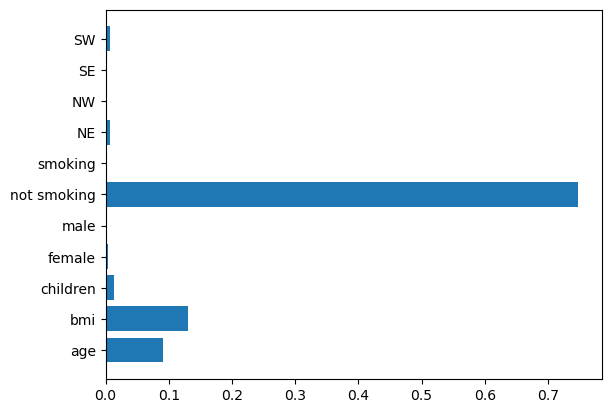

In [128]:
plt.barh(X_train.columns, xgb_r.feature_importances_)

In [23]:
xgb_r.feature_importances_

array([2.6508118e-03, 3.5373250e-03, 9.5868908e-04, 3.2035096e-04,
       0.0000000e+00, 9.8809344e-01, 0.0000000e+00, 1.5787005e-03,
       9.0480509e-04, 9.6431421e-04, 9.9156762e-04], dtype=float32)

## Neural networks

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.regularizers import L1, L1L2, L2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler


In [5]:
import_data()
X_train

,age,bmi,children,female,male,not smoking,smoking,NE,NW,SE,SW
0,43,26.030,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,58,28.215,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,53,31.350,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,54,29.200,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,19,34.900,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
664,18,31.350,4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
665,39,23.870,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
666,58,25.175,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
667,37,47.600,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [28]:
import_data()
X_train.drop(['not smoking', 'SW', 'female'], axis = 1, inplace= True)
X_train['age * smoking'] = X_train.age * X_train.smoking
X_train['bmi * smoking'] = X_train.bmi * X_train.smoking
X_train['children * smoking'] = X_train.children * X_train.smoking
X_train['NE * smoking'] = X_train.NE * X_train.smoking
X_train['NW * smoking'] = X_train.NW * X_train.smoking
X_train['SE * smoking'] = X_train.SE * X_train.smoking
X_train['age * male'] = X_train.age * X_train.male
X_train['bmi * male'] = X_train.bmi * X_train.male
X_train['children * male'] = X_train.children * X_train.male
X_train['age * bmi'] = X_train.age * X_train.bmi
X_train['NE * bmi'] = X_train.NE * X_train.bmi
X_train['NW * bmi'] = X_train.NW * X_train.bmi
X_train['SE * bmi'] = X_train.SE * X_train.bmi

#X_train['bmi * NE'] = X_train.age * X_train.bmi
#X_train['age * bmi'] = X_train.age * X_train.bmi


X_test.drop(['not smoking', 'SW', 'female'], axis = 1, inplace= True)
X_test['age * smoking'] = X_test.age * X_test.smoking
X_test['bmi * smoking'] = X_test.bmi * X_test.smoking
X_test['children * smoking'] = X_test.children * X_test.smoking
X_test['NE * smoking'] = X_test.NE * X_test.smoking
X_test['NW * smoking'] = X_test.NW * X_test.smoking
X_test['SE * smoking'] = X_test.SE * X_test.smoking
X_test['age * male'] = X_test.age * X_test.male
X_test['bmi * male'] = X_test.bmi * X_test.male
X_test['children * male'] = X_test.children * X_test.male
X_test['age * bmi'] = X_test.age * X_test.bmi
X_test['NE * bmi'] = X_test.NE * X_test.bmi
X_test['NW * bmi'] = X_test.NW * X_test.bmi
X_test['SE * bmi'] = X_test.SE * X_test.bmi

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_train

array([[ 0.27496393, -0.72254695, -0.90182305, ...,  1.41224141,
        -0.56413698, -0.57783853],
       [ 1.32291799, -0.35908977, -0.90182305, ..., -0.58666462,
         1.65108177, -0.57783853],
       [ 0.97359997,  0.16239227, -0.90182305, ..., -0.58666462,
        -0.56413698,  1.53669583],
       ...,
       [ 1.32291799, -0.86476933, -0.90182305, ...,  1.34658391,
        -0.56413698, -0.57783853],
       [-0.14421769,  2.86544911,  0.75110742, ..., -0.58666462,
        -0.56413698, -0.57783853],
       [ 1.11332717, -0.07880357, -0.90182305, ..., -0.58666462,
        -0.56413698, -0.57783853]])

In [24]:
model = Sequential()
#model.add(layers.Conv1D(activation = 'relu', filters =512 , kernel_size = 4))
model.add(layers.Dense(20, activation='relu', kernel_regularizer = L1L2()))
model.add(layers.Dropout(.3))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(.3))
model.add(layers.Dense(20, activation='relu', kernel_regularizer = L1(0.01)))
model.add(layers.Dropout(.3))
model.add(layers.Dense(20, activation='relu', kernel_regularizer = L1(0.01)))
#model.add(layers.MaxPooling1D(pool_size=2, input = (20, )))
#model.add(layers.Dropout(.3))
model.add(layers.Dense(20, activation='relu', kernel_regularizer = L2()))
model.add(layers.Dropout(.3))
model.add(layers.Dense(20, activation='relu', kernel_regularizer = L1(0.01)))
model.add(layers.Dropout(.3))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='linear', kernel_regularizer = L1(0.01)))
model.compile(optimizer=Adam(), 
              loss='MSLE',
              metrics=['MSLE'])
model.fit(X_train, y_train, epochs = 50, batch_size = 8, validation_split=0.2, verbose=1)


Epoch 1/50
67/67 [==============================] - 3s 8ms/step - loss: 71.4043 - MSLE: 68.8862 - val_loss: 47.5857 - val_MSLE: 45.1015
Epoch 2/50
67/67 [==============================] - 0s 3ms/step - loss: 29.0731 - MSLE: 26.5965 - val_loss: 14.9006 - val_MSLE: 12.4334
Epoch 3/50
67/67 [==============================] - 0s 3ms/step - loss: 10.8929 - MSLE: 8.4427 - val_loss: 6.1639 - val_MSLE: 3.7358
Epoch 4/50
67/67 [==============================] - 0s 3ms/step - loss: 5.3272 - MSLE: 2.9261 - val_loss: 3.7610 - val_MSLE: 1.3903
Epoch 5/50
67/67 [==============================] - 0s 3ms/step - loss: 3.7599 - MSLE: 1.4250 - val_loss: 3.0635 - val_MSLE: 0.7648
Epoch 6/50
67/67 [==============================] - 0s 3ms/step - loss: 3.1455 - MSLE: 0.8851 - val_loss: 2.8335 - val_MSLE: 0.6166
Epoch 7/50
67/67 [==============================] - 0s 3ms/step - loss: 2.8864 - MSLE: 0.7158 - val_loss: 2.6899 - val_MSLE: 0.5684
Epoch 8/50
67/67 [==============================] - 0s 3ms/step - l

In [6]:
from tensorflow.config import list_physical_devices
print(list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
import_data()
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [25]:
import_data()
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

model = Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear', kernel_regularizer = L1(0.0003)))
model.compile(optimizer=Adam(), 
            loss='Huber',
            metrics=['MSLE'])
model.fit(X_train, y_train, epochs = 90, batch_size = 4, verbose=1, validation_split = 0.2)


Epoch 1/90
134/134 [==============================] - 2s 3ms/step - loss: 8862.7988 - MSLE: 15.5925 - val_loss: 3955.6726 - val_MSLE: 0.3273
Epoch 2/90
134/134 [==============================] - 0s 2ms/step - loss: 4250.1885 - MSLE: 0.2748 - val_loss: 3271.3428 - val_MSLE: 0.2171
Epoch 3/90
134/134 [==============================] - 0s 2ms/step - loss: 4045.0715 - MSLE: 0.2301 - val_loss: 3051.7744 - val_MSLE: 0.1844
Epoch 4/90
134/134 [==============================] - 0s 2ms/step - loss: 3911.9053 - MSLE: 0.2631 - val_loss: 3679.4409 - val_MSLE: 0.2747
Epoch 5/90
134/134 [==============================] - 0s 2ms/step - loss: 3579.9048 - MSLE: 0.2239 - val_loss: 2765.8330 - val_MSLE: 0.1887
Epoch 6/90
134/134 [==============================] - 0s 2ms/step - loss: 3605.3049 - MSLE: 0.2317 - val_loss: 2560.1931 - val_MSLE: 0.1958
Epoch 7/90
134/134 [==============================] - 0s 2ms/step - loss: 3602.8159 - MSLE: 0.2357 - val_loss: 2354.0603 - val_MSLE: 0.1914
Epoch 8/90
134/134 

In [22]:
import_data()
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
for i in range(100):
    model = Sequential()
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(.25))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(.25))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(.25))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(.25))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=Adam(),
                loss='Huber',
                metrics=['MSLE'])
    model.fit(X_train, y_train, epochs = 90, batch_size = 4, verbose=1, validation_split=0.2)
    if float(model.get_metrics_result()['MSLE']) < 0.163:
        y_pred = pd.DataFrame()
        y_pred['id'] = ids
        y_pred['charges'] = model.predict(X_test).flatten()
        print(y_pred)
        y_pred.to_csv('submission_.csv', index = False)
        y_pred
        break

Epoch 1/90
134/134 [==============================] - 3s 4ms/step - loss: 8551.5957 - MSLE: 13.4751 - val_loss: 4529.6406 - val_MSLE: 0.3280
Epoch 2/90
134/134 [==============================] - 0s 3ms/step - loss: 4238.8975 - MSLE: 0.2650 - val_loss: 3004.2996 - val_MSLE: 0.1856
Epoch 3/90
134/134 [==============================] - 0s 3ms/step - loss: 3993.4402 - MSLE: 0.2311 - val_loss: 3057.3291 - val_MSLE: 0.2023
Epoch 4/90
134/134 [==============================] - 0s 3ms/step - loss: 3884.7473 - MSLE: 0.2553 - val_loss: 3147.9854 - val_MSLE: 0.2077
Epoch 5/90
134/134 [==============================] - 0s 3ms/step - loss: 3731.1995 - MSLE: 0.2173 - val_loss: 2821.0505 - val_MSLE: 0.1767
Epoch 6/90
134/134 [==============================] - 0s 3ms/step - loss: 3549.4189 - MSLE: 0.2021 - val_loss: 3088.9700 - val_MSLE: 0.2546
Epoch 7/90
134/134 [==============================] - 0s 3ms/step - loss: 3521.1226 - MSLE: 0.2207 - val_loss: 3098.4089 - val_MSLE: 0.2606
Epoch 8/90
134/134 

KeyboardInterrupt: 

In [ ]:
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = model.predict(X_test).flatten()
print(y_pred)
y_pred.to_csv('submission.csv', index = False)
y_pred 

In [14]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               1536      
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 128)              

In [16]:
%load_ext tensorboard

In [48]:
y_pred = pd.DataFrame()
y_pred['id'] = ids 
y_pred['charges'] = model.predict(X_test).flatten()
print(y_pred)
y_pred.to_csv('submission.csv', index = False)
y_pred

 1/21 [>.............................] - ETA: 0s

21/21 [==============================] - 0s 4ms/step
       id       charges
0     770   9459.089844
1     771   5587.417480
2     772  29959.365234
3     773   9746.650391
4     774  33533.777344
..    ...           ...
664  1434  12140.333008
665  1435   4259.685059
666  1436  11680.933594
667  1437   9073.920898
668  1438  25075.986328

[669 rows x 2 columns]


,id,charges
0,770,9459.089844
1,771,5587.417480
2,772,29959.365234
3,773,9746.650391
4,774,33533.777344
...,...,...
664,1434,12140.333008
665,1435,4259.685059
666,1436,11680.933594
667,1437,9073.920898
